<a href="https://colab.research.google.com/github/sarmi2325/Machine_Learning_LinearRegression/blob/main/placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries:

import os : Provides way to interact with os, allows you to access files

import pandas : library for data manipulation and analysis

import numpy : library for numerical operations in Python, providing support for large, multi-dimensional arrays and matrices

import matplotlib.pyplot : interface for creating various types of plots

import seaborn : statistical data visualization

%matplotlib inline : allows output of matplotlib plots to be displayed directly below the code cell

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading csv file

In [2]:
placement = pd.read_csv("placement.csv")

displays the first five and last five rows

In [4]:
print(placement,5)

     cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns] 5


Checking if there is any NAN (or) NULL values

In [5]:
placement.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [6]:
placement.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [7]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


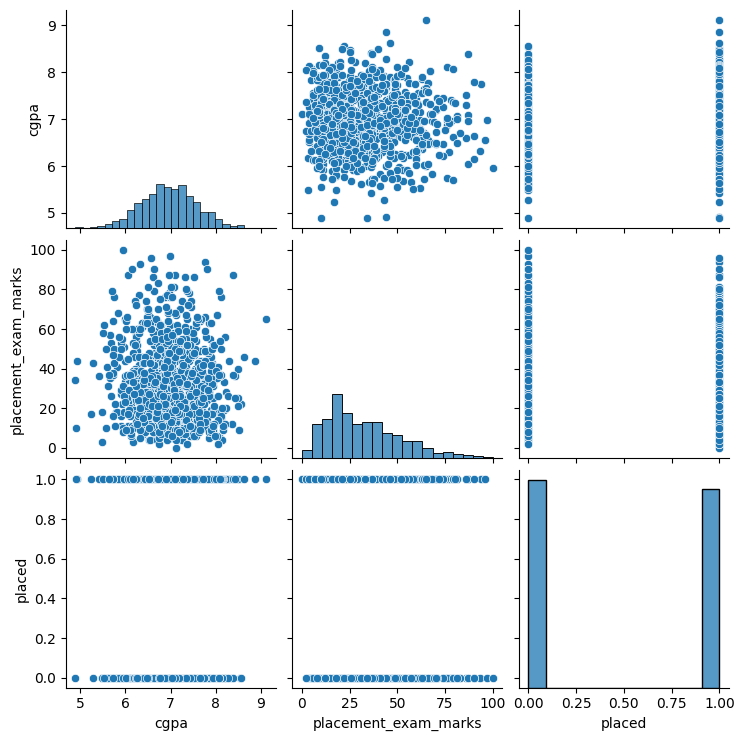

In [8]:
sns.pairplot(placement)

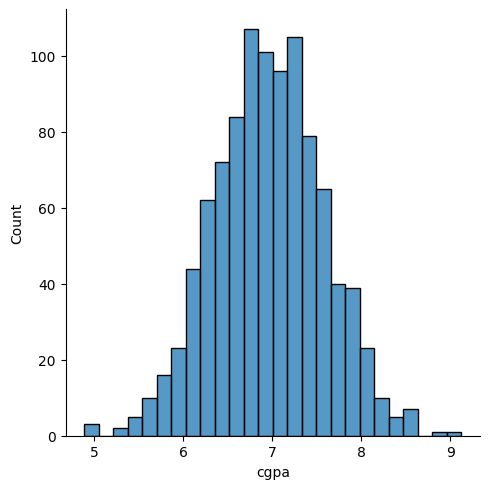

In [9]:
sns.displot(placement['cgpa'])

<Axes: >

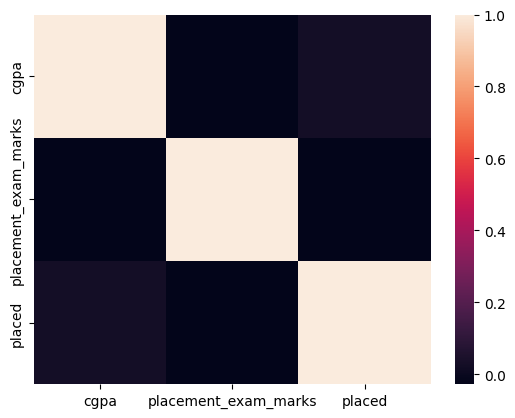

In [10]:
sns.heatmap(placement.corr())

x : Features
y : Labels

In [14]:
x=placement[['cgpa','placement_exam_marks']]
y=placement['placed']

Spliting training and testing dataset
training data = 60%
testing data = 40%

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

Training the model using LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [17]:
print(lm.intercept_)

0.6531318579962719


In [19]:
m=pd.DataFrame(lm.coef_,x.columns,columns=["co-eff"])
m

,co-eff
cgpa,-0.012739
placement_exam_marks,-0.001717


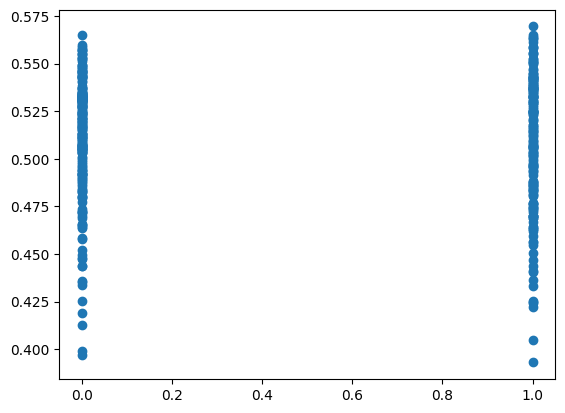

In [21]:
pred=lm.predict(x_test)
plt.scatter(y_test,pred)

In [22]:
from sklearn import metrics


In [23]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.5025077271775733
MSE: 0.25374518923579076
RMSE: 0.5037312668832368
